# Rayleigh-Bénard convection of a Darcy fluid 

In [ ]:
import numpy as np
from lucifex.fdm import AB2, CN
from lucifex.sim import run, xdmf_to_npz
from lucifex.viz import plot_colormap, create_animation, plot_line, save_figure, display_animation, get_ipynb_file_name
from crocodil.dns import dns_darcy_rayleigh_benard

STORE = 1
WRITE = None
DIR_BASE = f'./data_{get_ipynb_file_name()}'
DIR_PARAMS = ('Ra', 'Nx', 'Ny')

simulation = dns_darcy_rayleigh_benard(
    store_delta=STORE, 
    write_delta=WRITE, 
    dir_base=DIR_BASE, 
    dir_params=DIR_PARAMS,
)(
    aspect=2.0,
    Nx=64,
    Ny=64,
    scaling='advective',
    Ra=500.0,
    theta_ampl=1e-3,
    theta_freq=(12, 8), 
    theta_seed=(123, 456), 
    D_adv=AB2, 
    D_diff=CN,
    theta_limits=None,
    theta_stabilization=None,
    diagnostic=True,
)

n_stop = 400
dt_init = 1e-6
n_init = 5
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

if WRITE:
    xdmf_to_npz(simulation, delete_xdmf=False)

theta, u, psi = simulation['theta', 'u', 'psi']

In [2]:
time_slice = slice(0, None, 2)
titles = [f'$\\theta(t={t:.3f})$' for t in theta.time_series[time_slice]]

anim = create_animation(
    plot_colormap,
    colorbar=False,
)(theta.series[time_slice], title=titles)
anim_path = save_figure(f'{theta.name}(t)', simulation.dir_path, prefix_ipynb=False, get_path=True)(anim)

display_animation(anim_path)

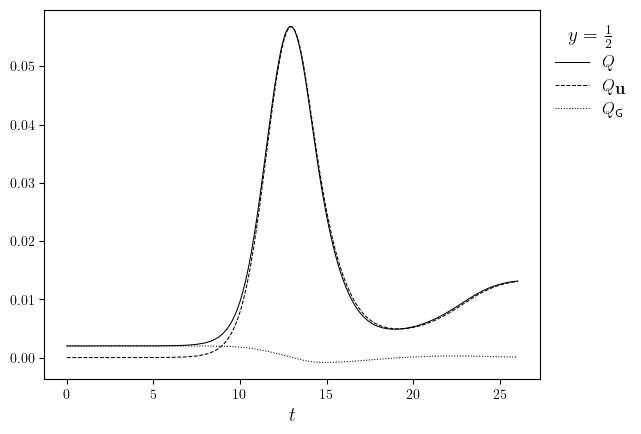

In [3]:
q = simulation['q']
q, qPlus, qMinus = q.split()

fig, ax = plot_line(
    [(q.time_series, [np.sum(i) for i in q.value_series]), (q.time_series, q.value_series)],
    cyc='black',
    x_label='$t$',
    legend_labels=['$Q$', '$Q_{\\textbf{u}}$', '$Q_{\mathsf{G}}$'],
    legend_title='$y=\\frac{1}{2}$',
)
save_figure('q(t)', simulation.dir_path, prefix_ipynb=False)(fig)

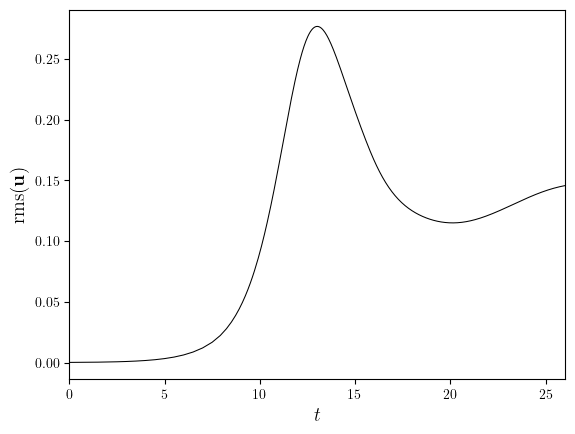

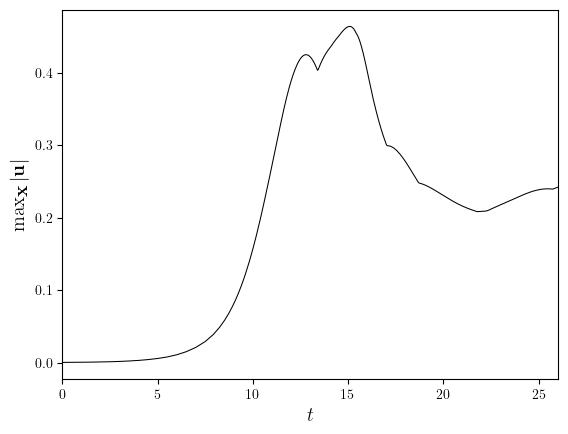

In [4]:
uRMS, uMinMax = simulation['uRMS', 'uMinMax']
uMax = uMinMax.sub(1)

fig, ax = plot_line(
    (uRMS.time_series, uRMS.value_series),
    x_label='$t$',
    y_label='$\mathrm{rms}(\\textbf{u})$',
)
save_figure('uRMS(t)', simulation.dir_path, prefix_ipynb=False)(fig)

fig, ax = plot_line(
    (uMax.time_series, uMax.value_series),
    x_label='$t$',
    y_label='$\max_{\\textbf{x}}|\\textbf{u}|$',
)
save_figure('uMax(t)', simulation.dir_path, prefix_ipynb=False)(fig)

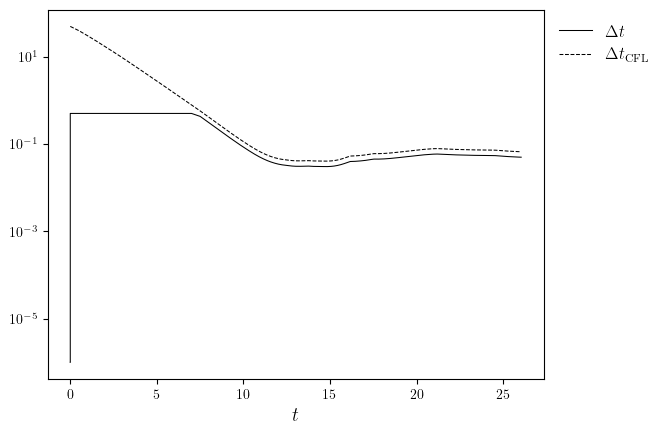

In [5]:
dt, dtCFL = simulation['dt', 'dtCFL']

fig, ax = plot_line(
    [(dt.time_series, dt.value_series), (dtCFL.time_series, dtCFL.value_series)],
    x_label='$t$',
    legend_labels=['$\Delta t$', '$\Delta t_{\mathrm{CFL}}$'],
)
ax.set_yscale('log')
save_figure('dt(t)', simulation.dir_path, prefix_ipynb=False)(fig)

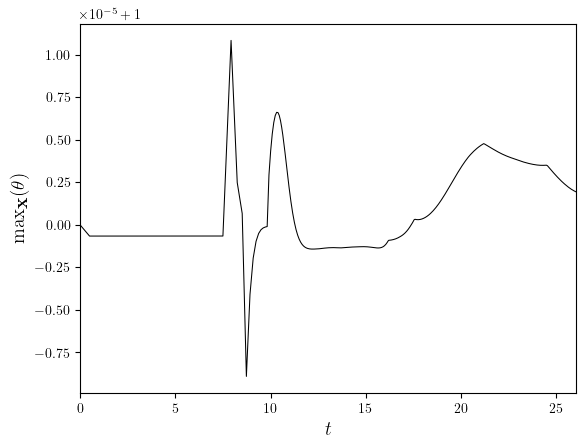

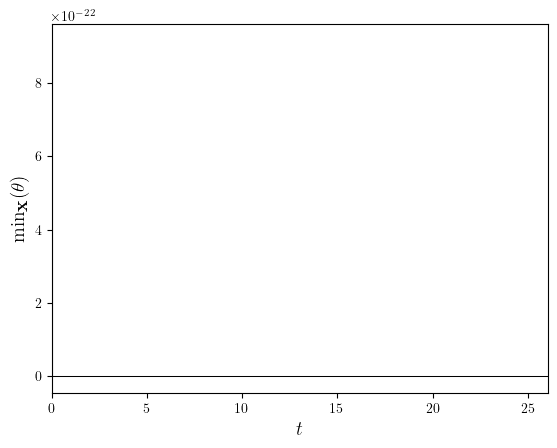

: 

In [ ]:
thetaMinMax = simulation['thetaMinMax']
thetaMin, thetaMax = thetaMinMax.split()

fig, ax = plot_line(
    (thetaMax.time_series, thetaMax.value_series),
    x_label='$t$',
    y_label='$\max_{\\textbf{x}}(\\theta)$',
)
save_figure('thetaMax(t)', simulation.dir_path)(fig)

fig, ax = plot_line(
    (thetaMin.time_series, thetaMin.value_series),
    x_label='$t$',
    y_label='$\min_{\\textbf{x}}(\\theta)$',
)
save_figure('thetaMin(t)', simulation.dir_path)(fig)